# Questions:
1. How can high-energy neutrons produce Ar41?
1. Why the peak 8 MeV deposition in Ar41 events?

In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [4]:
init = time.time()
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Neutrons_VariousConfig_08_20_2020", "Exports", "ExportFirst2500Events")

fileinprefix = "Export_Ar41_*part*csv"
df_neutronsGS = load_dataframe_from_files(dirin, fileinprefix)

print("[Info] Loaded data in {:.3f} seconds".format(time.time() - init))

[Info] Loading 5 files wt prefix:
Export_Ar41_*part*csv
....
[Info] Loaded data in 23.152 seconds


# Q: How HE-neutrons can produce Ar41?
**Hypotesis:** they don't cause the capture that produces Ar41 but rather they hit secondaries wt lower energies that are later captured.

**What we did to verify:**
1. Load the first 2500 events wt Ar41 (*for reason of memory consumption*)
1. Select only events wt starting energy `>100 MeV`
1. Select Ar41 in those events and check the `ParentTrackID`
1. Result: no events wt `ParentTrackID==1`, then we don't have Ar41 production from the primary neutron
1. Track a single event to verify it.

In [7]:
first_neutrons = df_neutronsGS[df_neutronsGS.PID==2112].groupby("eventnumber").first()

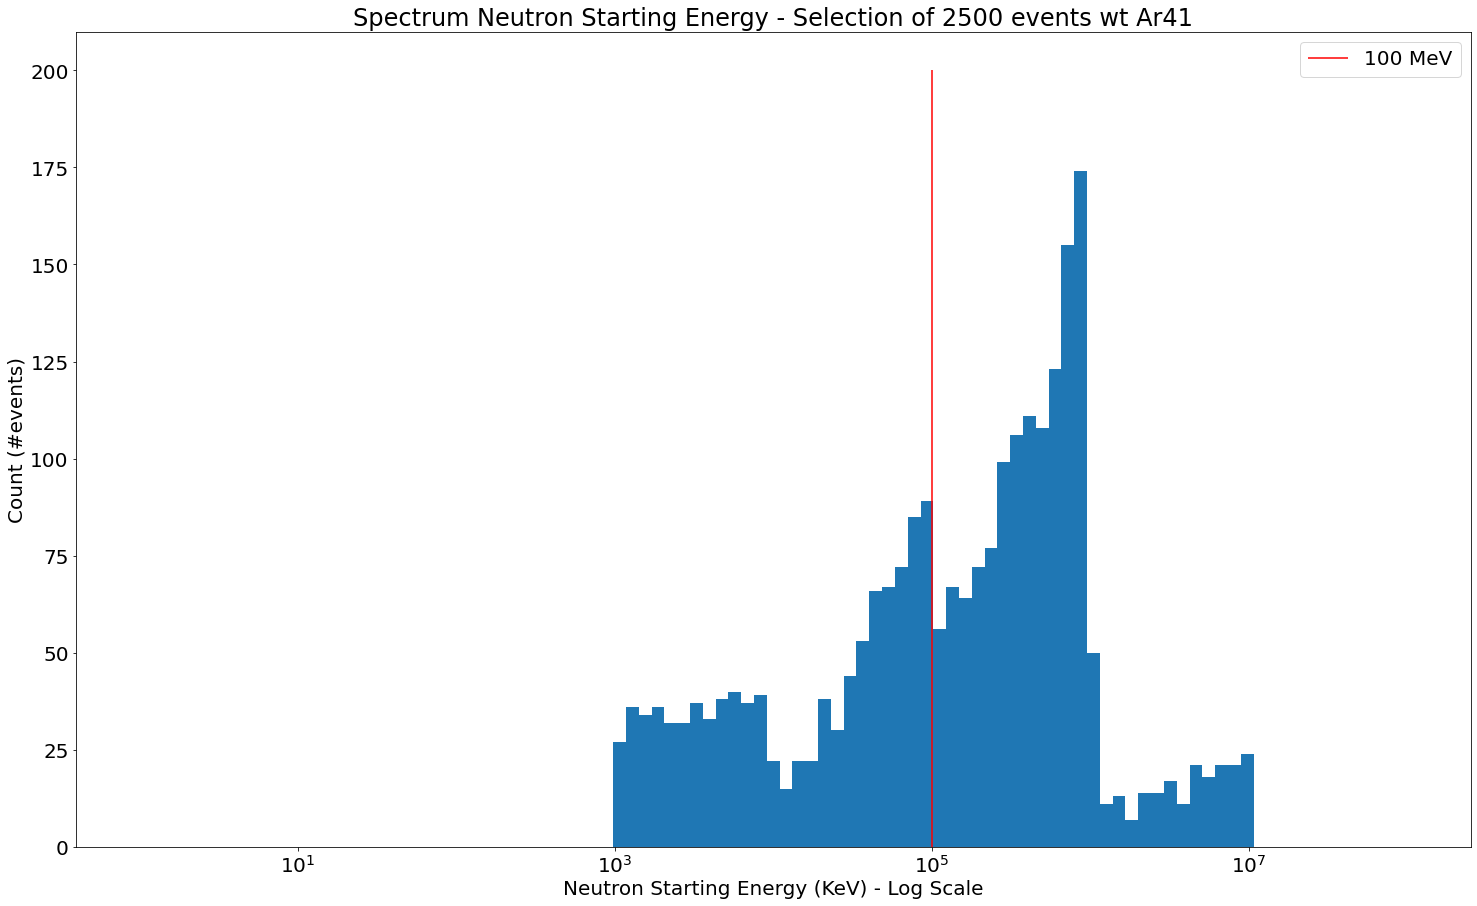

In [41]:
plt.title("Spectrum Neutron Starting Energy - Selection of 2500 events wt Ar41")
plt.hist(first_neutrons.kineticenergy, bins=np.logspace(0, 8, 100))
plt.xscale("log")
plt.vlines(100000, 0, 200, color='r', label="100 MeV")
plt.legend()
plt.xlabel("Neutron Starting Energy (KeV) - Log Scale")
plt.ylabel("Count (#events)")
plt.show()

### check ar41 parent tracks for all selected events

In [42]:
# select "high-energy" neutrons (>100MeV)
HEneutrons = first_neutrons[first_neutrons.kineticenergy>100000]
HEneutrons_events = HEneutrons.index     # store list of event numbers

In [43]:
# store the whole events for those neutrons
HEevents = df_neutronsGS[df_neutronsGS.eventnumber.isin(HEneutrons_events)]
ar41_HEevents = HEevents[HEevents.PID==1000180410]    # select only ar41 entries

In [45]:
# check if any ar41 has primary particle as parent
any(ar41_HEevents.ParentTrackID==1)

False

### track a single event (e.g. event 31)

In [46]:
event = df_neutronsGS[df_neutronsGS.eventnumber==31]
event

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,material,SensitiveVolumeID
396,2112,0,0.000000,884407.750782,0.000000,-1999.409565,-48.594161,-365.903423,31,1,primaryParticle,ArgonLiquid,201
397,1000170350,1,0.000000,3334.571361,0.834465,-1792.078077,-48.375222,-311.235326,31,11,neutronInelastic,ArgonLiquid,201
398,1000170350,1,1765.533771,1569.037590,0.834893,-1792.076886,-48.373990,-311.234676,31,11,ionIoni,ArgonLiquid,201
399,1000170350,1,1068.037912,500.999678,0.835491,-1792.075453,-48.373228,-311.233990,31,11,ionIoni,ArgonLiquid,201
400,1000170350,1,473.770292,27.229386,0.836213,-1792.074643,-48.372602,-311.233364,31,11,ionIoni,ArgonLiquid,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,11,863,13.317888,29.062141,0.000738,-1789.640332,-70.060909,-259.237704,31,866,eIoni,ArgonLiquid,201
6114,11,863,20.363669,8.698472,0.000784,-1789.640599,-70.059275,-259.241893,31,866,eIoni,ArgonLiquid,201
6115,11,863,8.698472,0.000000,0.000794,-1789.640409,-70.059427,-259.242392,31,866,eIoni,ArgonLiquid,201
6116,1000170350,863,0.000000,0.002357,0.000000,-1789.607738,-70.088366,-259.281785,31,864,RadioactiveDecay,ArgonLiquid,201


In [39]:
event[event.PID==1000180410]

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,material,SensitiveVolumeID
2157,1000180410,1454,0.000000,7.889983,315.425505,-1421.145201,487.713046,875.652289,31,1470,nCapture,ArgonLiquid,201
2158,1000180410,1454,7.889983,0.000000,315.425519,-1421.145201,487.713047,875.652291,31,1470,ionIoni,ArgonLiquid,201


In [47]:
event[event.tracknumber==1454]

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,material,SensitiveVolumeID
2153,2112,1360,0.000000,376.757989,200.086531,-1940.407169,193.183894,536.756089,31,1454,neutronInelastic,ArgonLiquid,201
2154,2112,1360,2.741546,374.019713,224.576849,-1812.812809,35.611011,582.523812,31,1454,hadElastic,ArgonLiquid,201
2155,2112,1360,5.683370,351.057447,276.789308,-1515.502504,321.795843,635.432051,31,1454,hadElastic,ArgonLiquid,201
2156,2112,1360,3.946350,347.115861,281.823803,-1516.642124,358.634581,653.949735,31,1454,hadElastic,ArgonLiquid,201


In [48]:
event[event.tracknumber==1360]

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,material,SensitiveVolumeID
2147,2112,854,0.000000,2145.391373,2.608333,-1674.376684,-212.834289,-166.660114,31,1360,neutronInelastic,ArgonLiquid,201
2148,2112,854,4.876631,2140.520558,5.594354,-1636.843382,-213.775316,-213.961865,31,1360,hadElastic,ArgonLiquid,201
2149,2112,854,3.584310,1828.865533,50.411433,-1431.089647,-459.320491,-571.285220,31,1360,hadElastic,ArgonLiquid,201
2150,2112,854,3.065961,1490.067998,71.732203,-1434.397840,-559.891342,-556.781124,31,1360,hadElastic,ArgonLiquid,201
2151,2112,854,6.669006,1394.019599,152.664231,-1535.377786,-67.084764,397.164202,31,1360,hadElastic,ArgonLiquid,201
2152,2112,854,9.779107,1294.719027,172.109366,-1805.469712,37.360235,493.483774,31,1360,hadElastic,ArgonLiquid,201


In [49]:
event[event.tracknumber==854]

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,eventnumber,tracknumber,creatorprocess,material,SensitiveVolumeID


### recap tracking event 31:
Primary Neutron (884 MeV) -> ? -> Neutron 854 (? MeV) -> Neutron 1360 (2 MeV) -> Neutron 1454 (376 KeV) -> Ar41

# Q: Why deposition peak at 8 MeV?

In [52]:
edep_event = df_neutronsGS.groupby("eventnumber").energydeposition.sum()

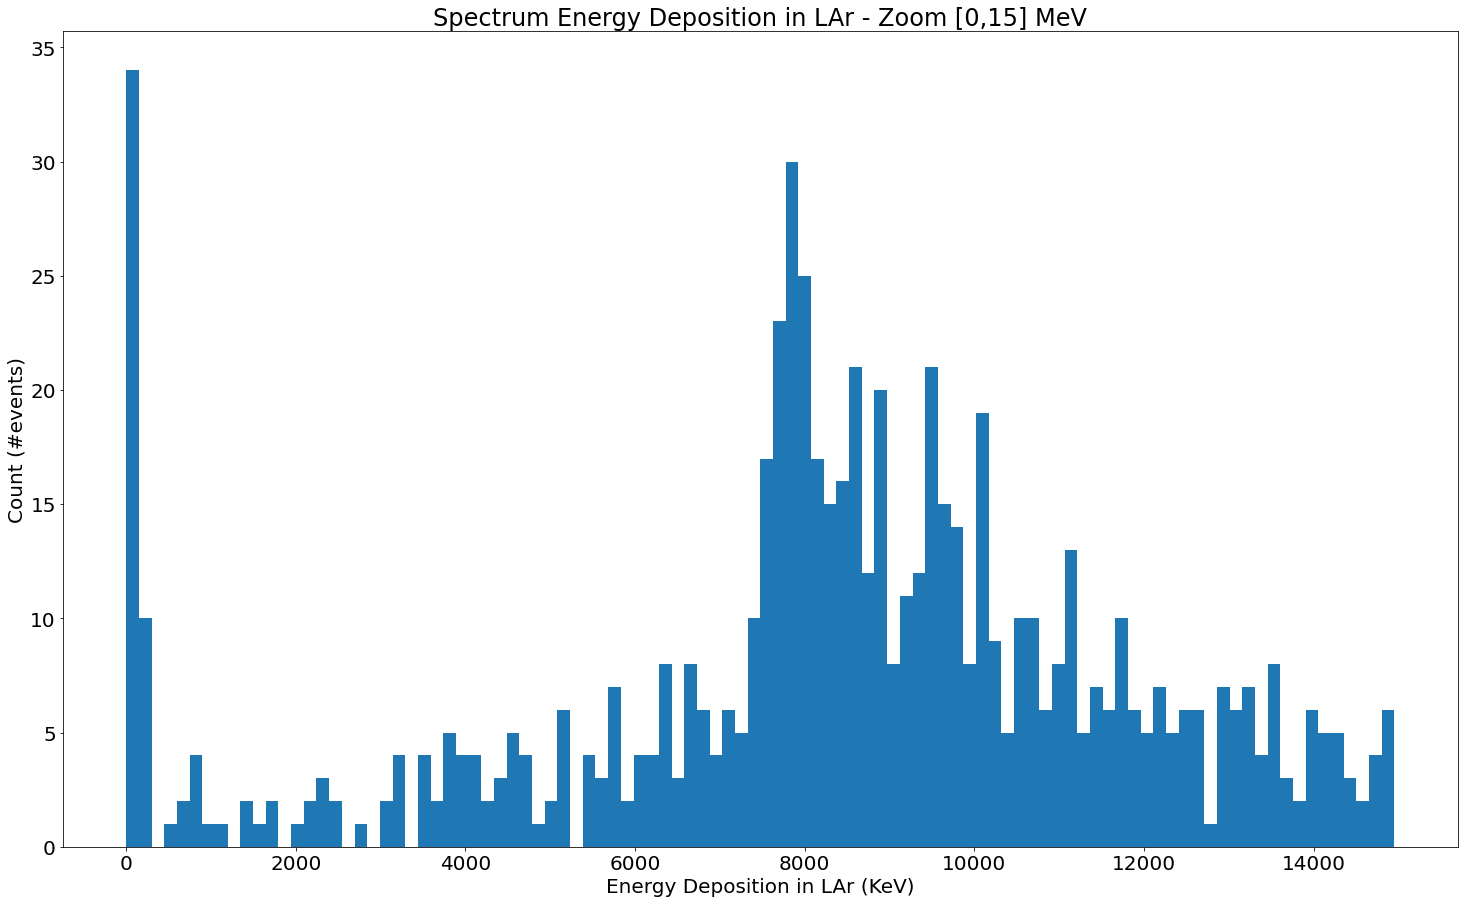

In [59]:
plt.title("Spectrum Energy Deposition in LAr - Zoom [0,15] MeV")
plt.hist(edep_event[edep_event<15000], bins=100)
plt.xlabel("Energy Deposition in LAr (KeV)")
plt.ylabel("Count (#events)")
plt.show()

In [64]:
events_8mev = edep_event[(edep_event>7500) & (edep_event<8500)]
events_8mev_list = events_8mev.index

In [66]:
df_events_8mev = df_neutronsGS[df_neutronsGS.eventnumber.isin(events_8mev_list)]

In [75]:
# check if K is produced in any event
df_events_8mev.eventnumber.nunique() == df_events_8mev[df_events_8mev.PID==1000190410].eventnumber.nunique()

True

### track single event

In [77]:
df_events_8mev.eventnumber.unique()

array([   875,   1334,   3556,   4770,   5810,   5850,   8780,   8906,
        10276,  11459,  11678,  12622,  15102,  17269,  18471,  19062,
        19289,  19660,  19739,  22349,  24735,  25472,  28140,  28266,
        31354,  32537,  32776,  34423,  35128,  36062,  36402,  36588,
        37287,  37392,  37716,  40961,  41626,  42150,  44157,  44420,
        46283,  46329,  47524,  47574,  49009,  50323,  50546,  52326,
        52344,  53736,  53770,  57642,  58203,  58897,  59173,  59923,
        60310,  60879,  61161,  63248,  64445,  65223,  65982,  67883,
        70269,  70354,  71848,  73367,  76550,  78834,  79562,  81299,
        83038,  83293,  83584,  88005,  93484,  94057,  97631,  99937,
       101526, 101772, 101948, 102705, 103417, 105992, 109637, 109673,
       110294, 111761, 112835, 113241, 114318, 114323, 114731, 116156,
       116182, 118831, 119309, 120736, 122119, 124984, 125465, 129004,
       129836, 130298, 130572, 131068, 131644, 137358, 137859, 138940,
      

In [78]:
event = df_events_8mev[df_events_8mev.eventnumber==875]

In [91]:
sorted_event = event.sort_values("time")
time = sorted_event.time
edep = sorted_event.energydeposition
cum_edep = np.cumsum(edep)

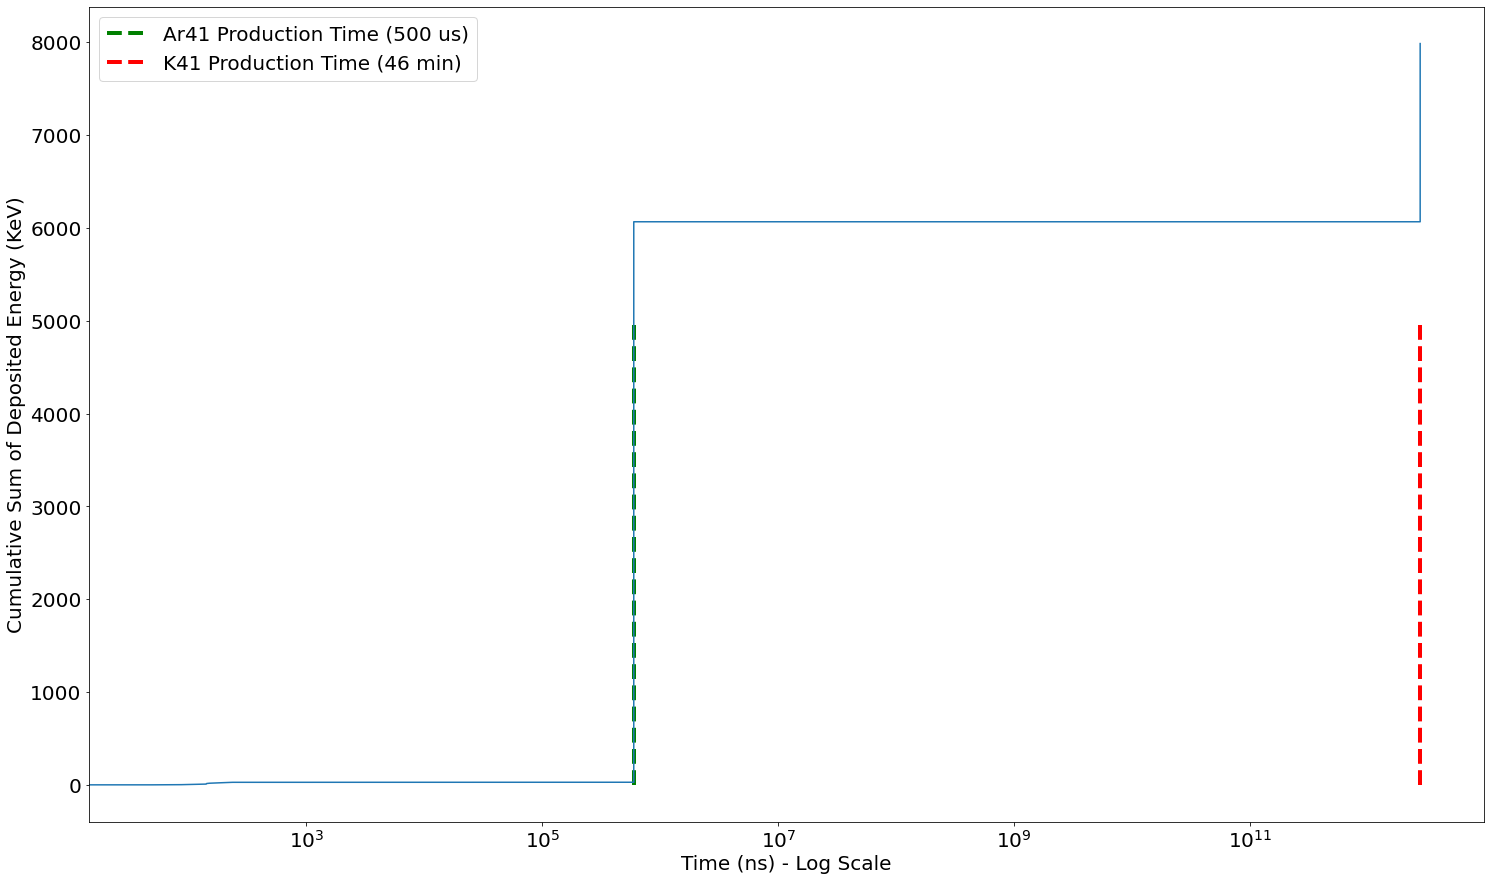

In [104]:
plt.plot(time, cum_edep)
plt.vlines(595626, 0, 5000, color='green', label="Ar41 Production Time (500 us)", linewidth=4, linestyles='dashed')
plt.vlines(2770000000000, 0, 5000, color='red', label="K41 Production Time (46 min)", linewidth=4, linestyles='dashed')
plt.xscale("log")
plt.xlabel("Time (ns) - Log Scale")
plt.ylabel("Cumulative Sum of Deposited Energy (KeV)")
plt.legend()
plt.show()

In [108]:
ar41_first_times = df_events_8mev[df_events_8mev.PID==1000180410].groupby("eventnumber").time.first()
k41_first_times = df_events_8mev[df_events_8mev.PID==1000190410].groupby("eventnumber").time.first()

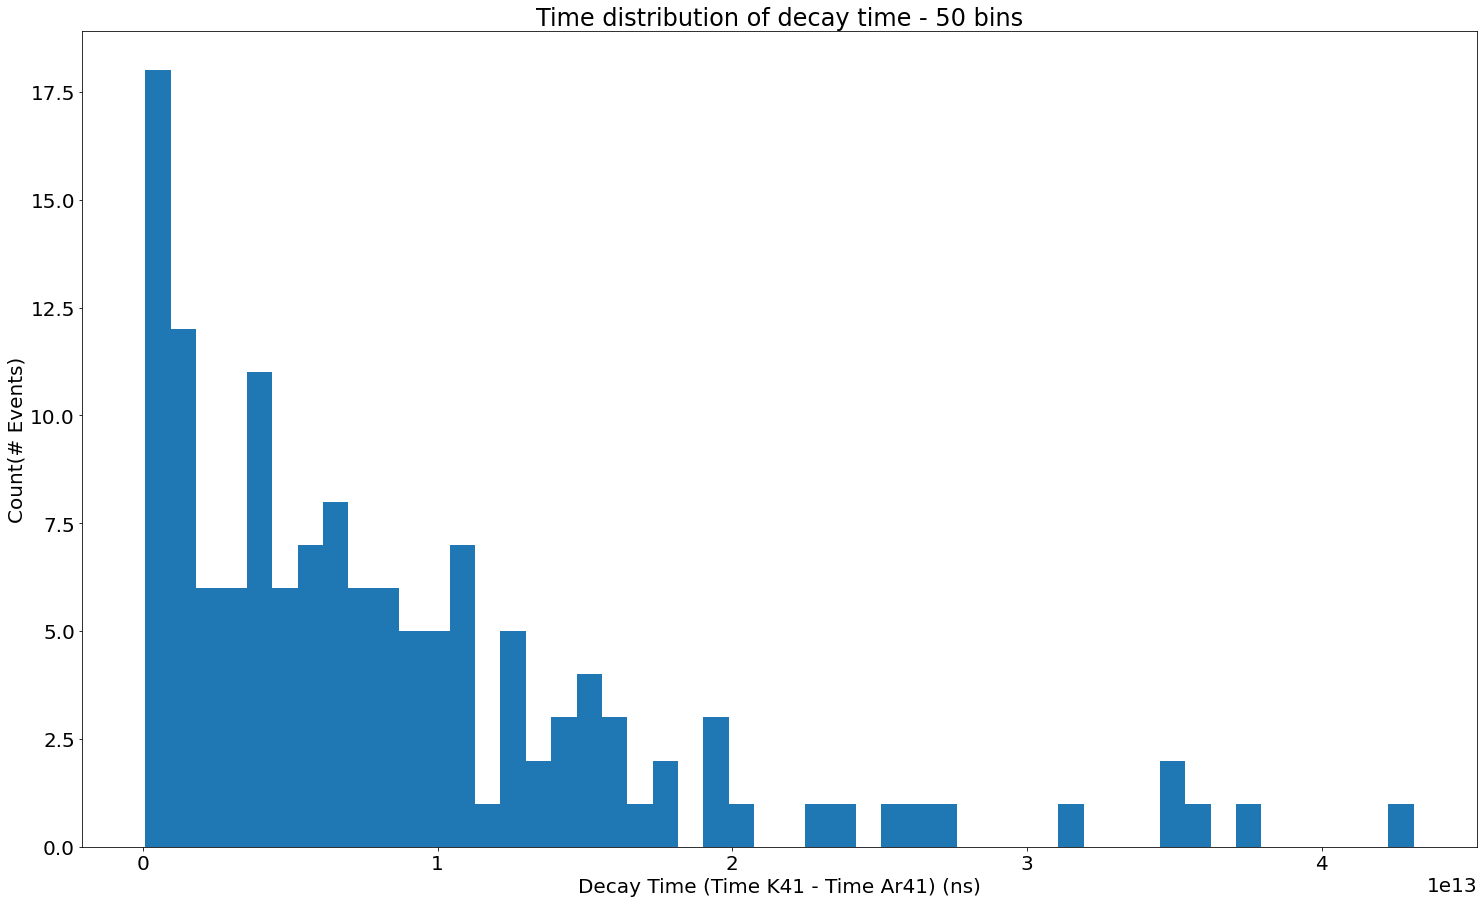

In [168]:
plt.hist(k41_first_times - ar41_first_times, bins=50, cumulative=False, density=False)
plt.title("Time distribution of decay time - 50 bins")
plt.xlabel("Decay Time (Time K41 - Time Ar41) (ns)")
plt.ylabel("Count(# Events)")
plt.show()

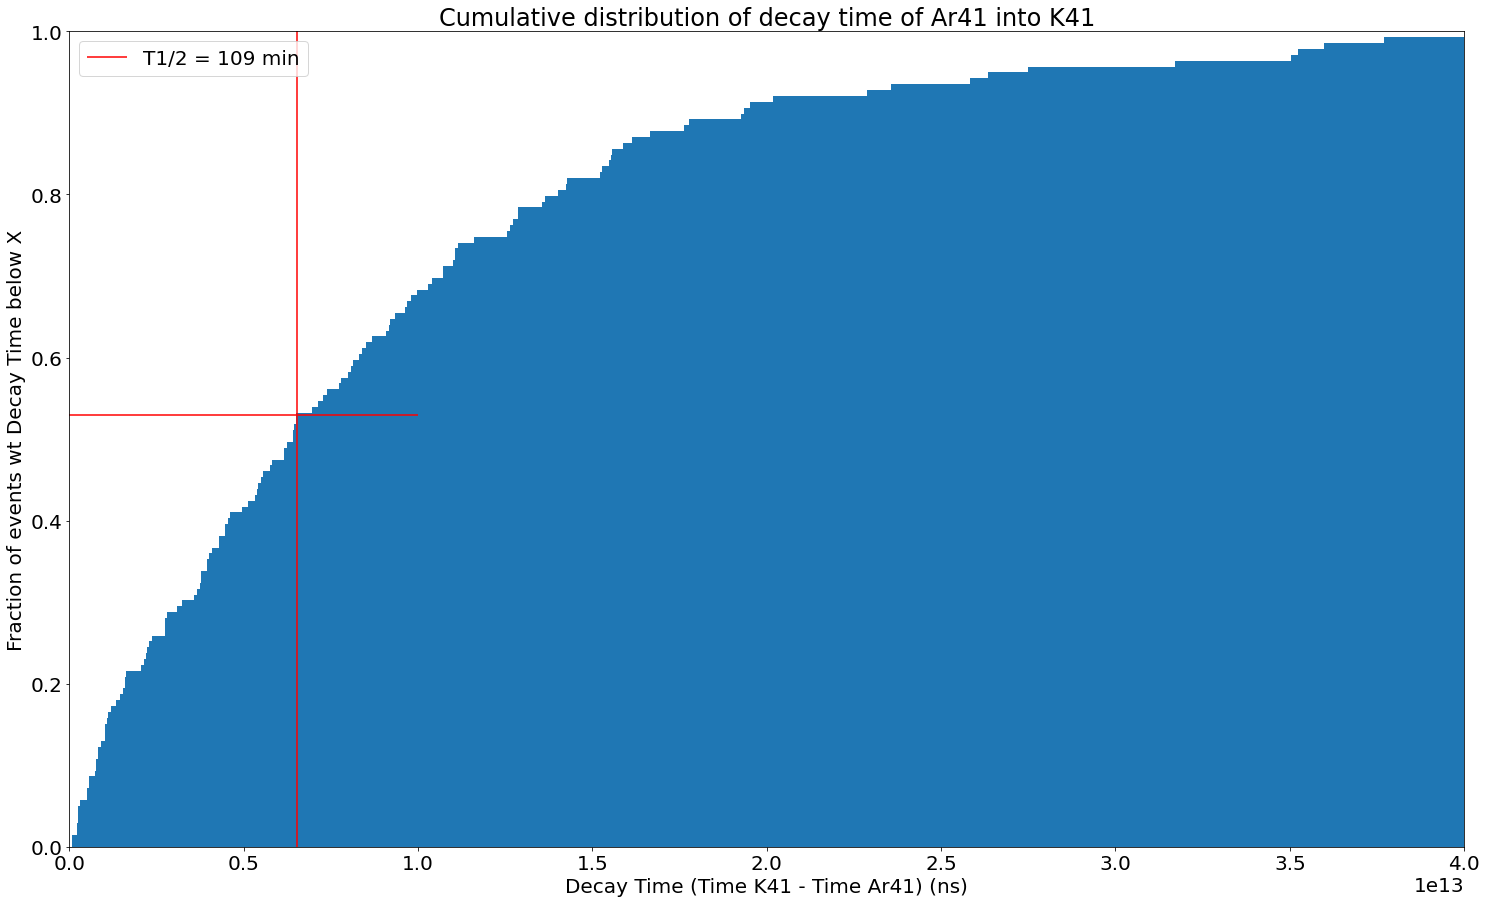

In [165]:
plt.hist(k41_first_times - ar41_first_times, bins=1000, cumulative=True, density=True)
plt.vlines(109*60*1000000000, 0, 1, color='red', label="T1/2 = 109 min")
plt.hlines(.53, 0, 10**13, color='red')
plt.legend()
plt.xlim(0, 4*10**13)
plt.ylim(0, 1)
plt.title("Cumulative distribution of decay time of Ar41 into K41")
plt.xlabel("Decay Time (Time K41 - Time Ar41) (ns)")
plt.ylabel("Fraction of events wt Decay Time below X")
plt.show()

In [151]:
diff = k41_first_times - ar41_first_times

In [154]:
len(diff[diff<109*60*1000000000])/len(diff)

0.5323741007194245